# ENUNCIADO

O projeto deve ser feito em grupo 5 ou 6 e será apresentado dia 24/01.
Pode ser apresentado por um ou dois membro(s) da equipe.
Tempo aproximado 10 a 20 min.

Como o projeto será avaliado, o notebook deve conter:
1) Criar uma lista de dicas/técnicas que aprenderam neste módulo que foram usadas no projeto

2) Indicar dentro do notebook cada item da lista (vide exemplo abaixo)

3) Estar publicado no Github

4) Você está apresentando as conclusões dos dados, pense com a cabeça de negócio, ex:

Qual a média de idade dos clientes que mais compraram?
Quantos porcento dos clientes que mais compraram, são os de maior ticket?
Quais os dias da semana os clientes mais compram?
Qual o percentual de crianças e adultos dentro nossos clientes?
Não queremos explicações de como funciona o código, queremos perguntas e respostas de negócio.

Esses quatro itens são obrigatórios, caso contrário não serão aceitos.

01) Divisão de Data Frames
02) Leitura de arquivo com dados
03) Mesclagem de Data Frames
04) Preenchimento valores faltantes
05) Normalização
06) Transformação de Categórico para Numérico
07) Tratamento de Datas
08) Demonstração tipos de dados
09) Quantidade de linhas de colunas
10) Eliminar linhas duplicadas
11) Redefinição de indice
12) Agrupamento
13) Criar novas colunas (pode tentar)
14) Aplicar funções e lambdas
15) Encontrar maior/menores valores
16) Separar os top 1%
17) Manipulação de datas
18) Visualização de dados utilizando Matplotlib

Item 16) Manipulação de datas

Pergunta: Quais são os dias da semana... ?

datetime....

Requisitos para a escolha da base de dados:

Esteja em 2 arquivos
Não esteja completo
Tenha dados categóricos(qualitativos) e numéricos(quantitativos)
Tenha datas
Quantidade de campos grande (facilita pensar em perguntas de negócio para responder)

Dataset selecionado:
https://www.kaggle.com/code/melikedilekci/supermarket-sales-eda/notebook

# TAREFAS 23/01/2024 00:59

- Terminar os gráficos para TODAS as perguntas.
- Verificar se é possível exportar de alguma maneira o notebook para pdf.
  (fpdf ou pytofdp, LATEX ou pdfkit) (Ultima prioridade, somente um PLUS).
- ~~Acrescentar perguntas de Negócios para a lista de perguntas.~~
- ~~Númerar e organizar as perguntas de negócio no código.~~
- Ajustar as cores de todos os graficos para manter um padrão.
- ~~Organizar a ordem das perguntas~~ e montar um roteiro de apresentação.
- ~~Trocar a o grafico de top3 produtos mais/menos vendidos de quantidade de vendas por volume de faturamento.~~

## PERGUNTAS DE NEGÓCIO

### Perguntas: 
1) ~~Otimização do ticket médio: Como podemos otimizar o ticket médio das transações?~~

2) ~~Volume de compras no mês: Qual é o período do mês em que observamos o maior volume de compras e como podemos capitalizar esse aumento?~~

3) ~~Padrões de consumo por gênero: Quais são os padrões de consumo por gênero para cada categoria de produtos disponíveis?~~

4) ~~Categorias de produtos mais vendidas: Quais são as três categorias de produtos mais vendidas e como podemos maximizar sua performance?~~

5) ~~Categorias de produtos menos vendidas: Quais são as três categorias de produtos menos vendidas, e quais estratégias podem ser implementadas para impulsionar suas vendas?~~

6) ~~Adesão de membros: Como podemos aumentar a adesão de membros ao relacionar o meio de pagamento com os benefícios do programa de membership?~~

7) ~~Fidelização de membros: Como a quantidade de membros impacta a fidelização e quais estratégias podem ser adotadas para aumentar a fidelidade dos membros?~~

8) ~~Wordcloud e preferências dos clientes: Como a wordcloud reflete as preferências dos clientes e quais insights podemos extrair para aprimorar a oferta de produtos?~~

CARLOS H 9) Vendas por categoria de produtos: Em que horários ocorrem as vendas mais expressivas para cada categoria de produtos, e como podemos alinhar o estoque e a equipe de vendas a esses padrões?

CARLOS H 10) Horários lucrativos: Quais são os horários mais lucrativos para o negócio? 

11) ~~Média de avaliações dos clientes: Qual é a média de avaliações dos clientes e como podemos melhorar a experiência do cliente para aumentar essa média?~~

12) ~~Vendas para afiliados: Dentro de um número x de vendas no mês, quantas foram para afiliados?~~

13) ~~Influência do tipo de cliente no ticket médio: Como o tipo de cliente (Member/Normal) influencia no ticket médio de compra?~~

LEO 14) Impacto do método de pagamento na taxa de conversão de vendas: Como o método de pagamento impacta na taxa de conversão de vendas?

15) ~~Média de avaliação dos produtos: Qual é a média de avaliação dos produtos e como ela se relaciona com as vendas?~~

CARLOS H 16) Influência da localização geográfica nas preferências de produtos: Como a localização geográfica das filiais influencia nas preferências de produtos?

17) ~~Relação entre o horário de compra e a quantidade de produtos adquiridos: Qual é a relação entre o horário de compra e a quantidade de produtos adquiridos? (Linha temporal x Quantity)~~

18) Impacto da participação em programas de fidelidade nas decisões de compra: Como a participação em programas de fidelidade impacta nas decisões de compra?

19) ~~Gênero predominante entre os clientes: Qual é o gênero predominante entre os clientes?~~

20) ~~Linha de produto mais popular: Qual é a linha de produto mais popular?~~

CARLOS H 21) Classificação média dos clientes: Qual é a classificação média dos clientes?

CARLOS H 22) Cidade com o maior número de vendas: Qual é a cidade com o maior número de vendas?


# Início do Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import Normalize

%matplotlib inline

### 01) Divisão de Data Frames

In [2]:
df_importacao_completo = pd.read_csv('supermarket_sales.csv')

In [3]:
metade = len(df_importacao_completo) // 2

In [4]:
df_importacao_parte1 = df_importacao_completo.iloc[:metade, :]
df_importacao_parte2 = df_importacao_completo.iloc[metade:, :]

In [5]:
df_importacao_parte1.to_csv('supermarket_sales_1.csv', index=False)
df_importacao_parte2.to_csv('supermarket_sales_2.csv', index=False)

In [6]:
df_parte1 = pd.read_csv('supermarket_sales_1.csv')
df_parte2 = pd.read_csv('supermarket_sales_2.csv')

### 02) Mesclagem de DataFrames

In [7]:
df = pd.concat([df_parte1, df_parte2], ignore_index=True)

In [8]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
colunas_para_remover = ['Invoice ID', 'cogs', 'gross margin percentage', 'gross income']

In [11]:
df = df.drop(colunas_para_remover, axis=1)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,4.1


### 03) Leitura de arquivo com dados

In [12]:
df.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,5.9


### 04) Preenchimento valores faltantes

In [13]:
df.isna().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

O dataset está limpo e livre de valores faltantes

### 05) Normalização

In [14]:
df['Rating'].value_counts(normalize=True)

Rating
6.0     0.026
6.6     0.024
4.2     0.022
9.5     0.022
6.5     0.021
        ...  
4.0     0.011
5.3     0.011
8.3     0.011
4.6     0.008
10.0    0.005
Name: proportion, Length: 61, dtype: float64

In [15]:
df['Rating'].fillna(df['Rating'].mean()).mean()

6.9727

In [16]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [17]:
df.isna().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

### 06) Transformação de Categórico para Numérico

### 07) Tratamento de Datas

In [18]:
tipos_de_dados = df['Date'].dtypes
print('Tipo de dados da coluna Date:', tipos_de_dados)

Tipo de dados da coluna Date: object


In [19]:
tipos_de_dados = df['Time'].dtypes
print('Tipo de dados da coluna Time:', tipos_de_dados)

Tipo de dados da coluna Time: object


In [20]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M")

In [21]:
tipos_de_dados = df['Date'].dtypes
print('Tipo de dados da coluna Date:', tipos_de_dados)

Tipo de dados da coluna Date: datetime64[ns]


In [22]:
tipos_de_dados = df['Time'].dtypes
print('Tipo de dados da coluna Time:', tipos_de_dados)

Tipo de dados da coluna Time: datetime64[ns]


### 08) Demonstração tipos de dados

In [23]:
tipos_de_dados = df.dtypes
display(tipos_de_dados)

Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
Rating                  float64
dtype: object

### 09) Quantidade de linhas e colunas

In [24]:
num_linhas, num_colunas = df.shape
print(f'Número de linhas: {num_linhas}, Número de colunas: {num_colunas}')

Número de linhas: 1000, Número de colunas: 13


### 10) Eliminar linhas duplicadas

In [25]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,4.1


In [26]:
df = df.drop_duplicates()

In [27]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,4.1


### 11) Redefinição de índice

In [28]:
df = df.reset_index(drop=True)

In [29]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,4.1


### 12) Agrupamento

In [30]:
vendas_mensais = df.groupby('Product line')['Total'].sum()
vendas_mensais.sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

### 13) Criar novas colunas

In [31]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [32]:
tipos_de_dados = df.dtypes
display(tipos_de_dados)

Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
Rating                  float64
Day                       int32
Month                     int32
Year                      int32
dtype: object

### 14) Aplicar funções e lambdas

Aplicando uma função lambda para um hipótese de merge com um dataset que avalia de 1 a 5:

In [33]:
df['Rating 2.0'] = df['Rating'].apply(lambda x: x / 2)

In [34]:
display(df['Rating 2.0'])

0      4.55
1      4.80
2      3.70
3      4.20
4      2.65
       ... 
995    3.10
996    2.20
997    3.85
998    2.05
999    3.30
Name: Rating 2.0, Length: 1000, dtype: float64

### 15) Encontrar maior/menor valores

In [35]:
melhor_avaliacao = df['Rating'].max()
pior_avaliacao = df['Rating'].min()

In [36]:
melhor_avaliacao

10.0

In [37]:
pior_avaliacao

4.0

### 16) Separar os top 1%

In [38]:
top_1_percento = df.nlargest(int(0.01 * len(df)), 'Unit price')

In [39]:
top_1_percento

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,Day,Month,Year,Rating 2.0
122,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.9820,944.6220,2019-03-09,1900-01-01 17:26:00,Credit card,4.2,9,3,2019,2.10
983,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,2019-01-23,1900-01-01 10:33:00,Cash,6.1,23,1,2019,3.05
930,B,Mandalay,Normal,Male,Home and lifestyle,99.92,6,29.9760,629.4960,2019-03-24,1900-01-01 13:33:00,Ewallet,7.1,24,3,2019,3.55
494,B,Mandalay,Normal,Male,Fashion accessories,99.89,2,9.9890,209.7690,2019-02-26,1900-01-01 11:48:00,Ewallet,7.1,26,2,2019,3.55
283,A,Yangon,Member,Male,Health and beauty,99.83,6,29.9490,628.9290,2019-03-04,1900-01-01 15:02:00,Ewallet,8.5,4,3,2019,4.25
300,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.9820,209.6220,2019-01-02,1900-01-01 18:09:00,Credit card,6.7,2,1,2019,3.35
941,C,Naypyitaw,Member,Male,Fashion accessories,99.82,9,44.9190,943.2990,2019-03-27,1900-01-01 10:43:00,Cash,6.6,27,3,2019,3.30
362,C,Naypyitaw,Normal,Male,Food and beverages,99.79,2,9.9790,209.5590,2019-03-07,1900-01-01 20:37:00,Ewallet,8.0,7,3,2019,4.00
326,A,Yangon,Member,Male,Food and beverages,99.78,5,24.9450,523.8450,2019-03-09,1900-01-01 19:09:00,Cash,5.4,9,3,2019,2.70
209,B,Mandalay,Normal,Female,Electronic accessories,99.73,9,44.8785,942.4485,2019-03-02,1900-01-01 19:42:00,Credit card,6.5,2,3,2019,3.25


### 17) Manipulação de datas

### 18) Visualização de dados utilizando Matplotlib

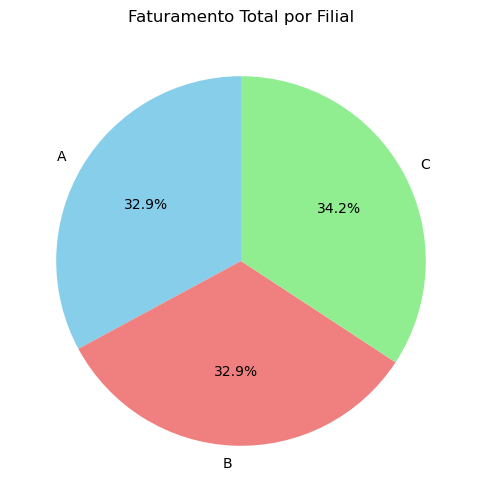

In [40]:
faturamento_por_filial = df.groupby('Branch')['Total'].sum()

plt.figure(figsize=(6, 6))
plt.pie(faturamento_por_filial, labels=faturamento_por_filial.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Faturamento Total por Filial')
plt.show()

# Perguntas de negócio

## 1) Otimização do ticket médio: Como podemos otimizar o ticket médio das transações?



In [41]:
df['Total'].mean()

322.966749

In [42]:
ticket_medio_genero = df.groupby('Gender').agg({'Total': 'sum', 'Quantity': 'count'})

ticket_medio_genero.rename(columns={'Total': 'Montante', 'Quantity': 'No. Compras'}, inplace=True)

ticket_medio_genero['Ticket Médio'] = ticket_medio_genero['Montante'] / ticket_medio_genero['No. Compras']

print(ticket_medio_genero[['Montante', 'No. Compras', 'Ticket Médio']])

          Montante  No. Compras  Ticket Médio
Gender                                       
Female  167882.925          501    335.095659
Male    155083.824          499    310.789226


In [43]:
ticket_label = ticket_medio_genero['Ticket Médio']

## 2) Volume de compras no mês: Qual é o período do mês em que observamos o maior volume de compras e como podemos capitalizar esse aumento?

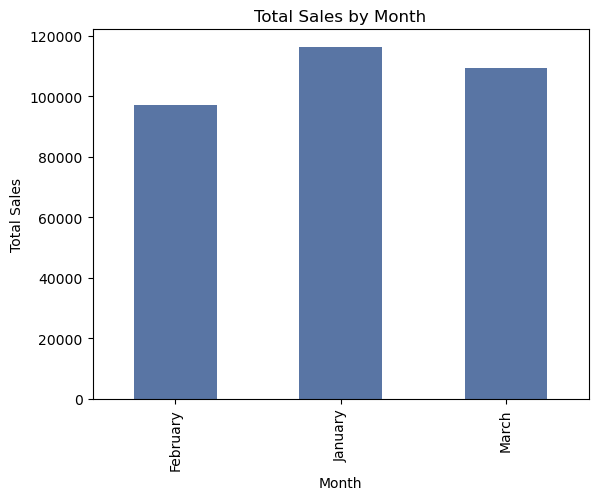

In [44]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Month'] = df['Date'].dt.month_name()  


vendas_mensais = df.groupby('Month')['Total'].sum()


fig, ax = plt.subplots()
vendas_mensais.plot(kind='bar', color='#5975A4')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month')


plt.show()

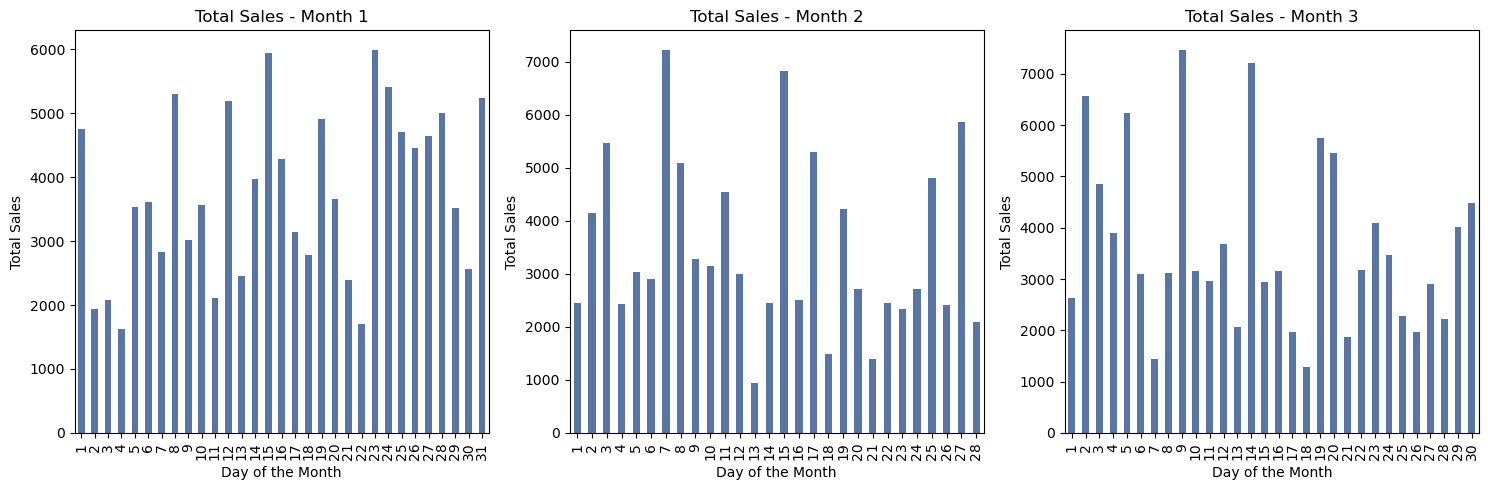

In [45]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for month, ax in zip(range(1, 4), axes):
    dia_mes = df[df['Month'] == month]
    vendas_diarias = dia_mes.groupby('Day')['Total'].sum()    
    
    vendas_diarias.plot(kind='bar', color='#5975A4', ax=ax)
    ax.set_title(f'Total Sales - Month {month}')
    ax.set_xlabel('Day of the Month')
    ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

## 3) Padrões de consumo por gênero: Quais são os padrões de consumo por gênero para cada categoria de produtos disponíveis?

In [46]:
filtro_mulher = df[df['Gender'] == 'Female']
filtro_homem = df[df['Gender'] == 'Male']

In [47]:
transacoes_homem = filtro_homem['Product line'].value_counts()
transacoes_mulher= filtro_mulher['Product line'].value_counts()

In [48]:
transacoes_homem

Product line
Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: count, dtype: int64

In [49]:
transacoes_mulher

Product line
Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: count, dtype: int64

In [50]:
produtos = df['Product line'].unique()
produtos

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [51]:
transacoes_homem = transacoes_homem.reindex(produtos, fill_value=0)
transacoes_mulher = transacoes_mulher.reindex(produtos, fill_value=0)
index = np.arange(len(produtos))
index

array([0, 1, 2, 3, 4, 5])

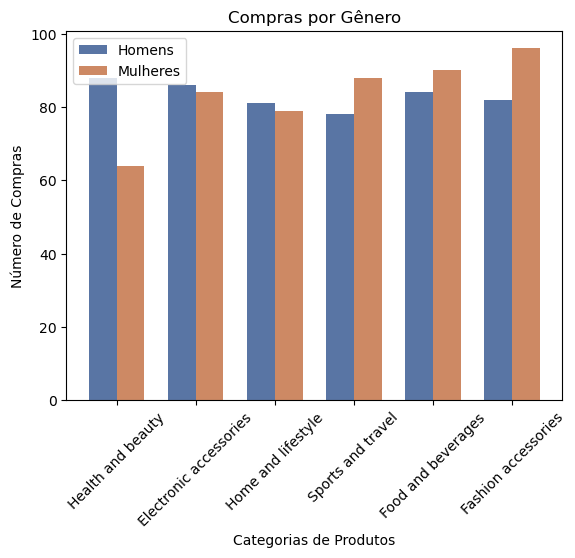

In [52]:
index = np.arange(len(produtos))
index

fig, ax = plt.subplots()
bar_width = 0.35


barra_homem = ax.bar(index, transacoes_homem, bar_width, label='Homens', color='#5975A4')
barra_mulher = ax.bar(index + bar_width, transacoes_mulher, bar_width, label='Mulheres', color="#CD8964")

ax.set_xlabel('Categorias de Produtos')
ax.set_ylabel('Número de Compras')
ax.set_title('Compras por Gênero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(produtos, minor=False, rotation=45)
ax.legend()

plt.show()

## 4) Categorias de produtos mais vendidas: Quais são as três categorias de produtos mais vendidas e como podemos maximizar sua performance?

In [53]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating', 'Day', 'Month', 'Year', 'Rating 2.0'],
      dtype='object')

In [54]:
produtos_mais_vendidos = df.groupby('Product line')['Total'].sum()
produtos_mais_vendidos

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [55]:
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)
top3_mais_vendidos

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Name: Total, dtype: float64

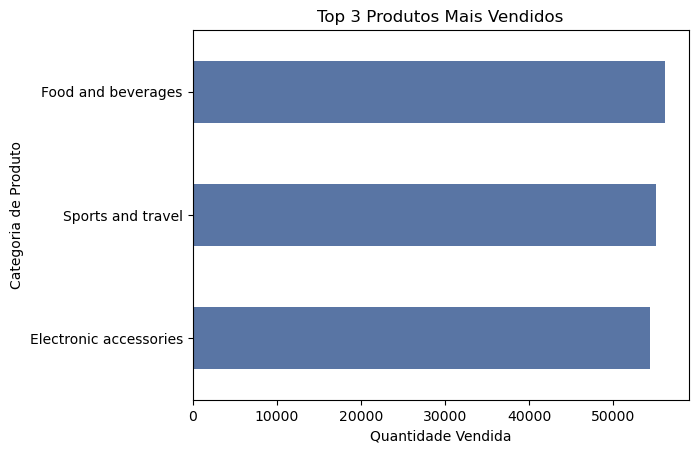

In [56]:
produtos_mais_vendidos = df.groupby('Product line')['Total'].sum()
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)

fig, ax = plt.subplots()
top3_mais_vendidos.sort_values().plot(kind='barh', color='#5975A4')
ax.set_xlabel('Quantidade Vendida')
ax.set_ylabel('Categoria de Produto')
ax.set_title('Top 3 Produtos Mais Vendidos')

plt.show()

## 5) Categorias de produtos menos vendidas: Quais são as três categorias de produtos menos vendidas, e quais estratégias podem ser implementadas para impulsionar suas vendas?

In [57]:
produtos_menos_vendidos = df.groupby('Product line')['Total'].sum()
produtos_menos_vendidos

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [58]:
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)
top3_menos_vendidos

Product line
Health and beauty      49193.739
Home and lifestyle     53861.913
Fashion accessories    54305.895
Name: Total, dtype: float64

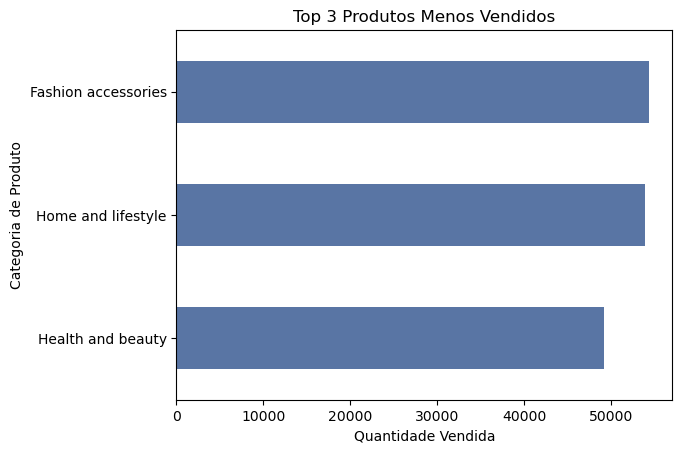

In [59]:
produtos_menos_vendidos = df.groupby('Product line')['Total'].sum()
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)

fig, ax = plt.subplots()
top3_menos_vendidos.plot(kind='barh', color='#5975A4')
ax.set_xlabel('Quantidade Vendida')
ax.set_ylabel('Categoria de Produto')
ax.set_title('Top 3 Produtos Menos Vendidos')

plt.show()

## 6) Adesão de membros: Como podemos aumentar a adesão de membros ao relacionar o meio de pagamento com os benefícios do programa de membership?

In [60]:
pagamento_total = df['Total'].sum()
pagamento_total

322966.749

In [61]:
pagamentos_membros = df.loc[df['Customer type'].isin(['Member']), ['Payment', 'Total']]
pagamentos_membros

,Payment,Total
0,Ewallet,548.9715
3,Ewallet,489.0480
6,Ewallet,433.6920
8,Credit card,76.1460
9,Credit card,172.7460
...,...,...
988,Ewallet,864.5700
989,Credit card,633.1080
994,Ewallet,63.9975
997,Cash,33.4320


In [62]:
pagamentos_nao_membros = df.loc[df['Customer type'].isin(['Normal']), ['Payment', 'Total']]
pagamentos_nao_membros

,Payment,Total
1,Cash,80.2200
2,Credit card,340.5255
4,Ewallet,634.3785
5,Ewallet,627.6165
7,Ewallet,772.3800
...,...,...
992,Ewallet,121.8630
993,Ewallet,183.6450
995,Ewallet,42.3675
996,Ewallet,1022.4900


In [63]:
meios_pagamentos = df['Payment'].unique()
meios_pagamentos

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [64]:
total_pagamentos_membros = pagamentos_membros.groupby('Payment')['Total'].sum()
total_pagamentos_membros

Payment
Cash           54661.0155
Credit card    57771.4725
Ewallet        51790.9560
Name: Total, dtype: float64

In [65]:
total_pagamentos_nao_membros = pagamentos_nao_membros.groupby('Payment')['Total'].sum()
total_pagamentos_nao_membros

Payment
Cash           57545.5545
Credit card    42995.5995
Ewallet        58202.1510
Name: Total, dtype: float64

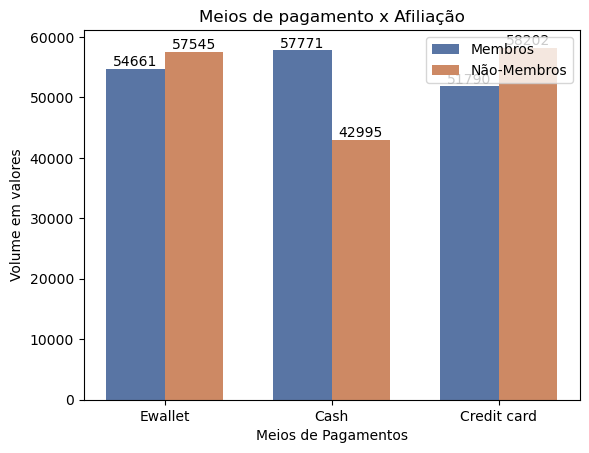

In [66]:
index = np.arange(len(meios_pagamentos))
index

fig, ax = plt.subplots()
bar_width = 0.35


barra_membros = ax.bar(index, total_pagamentos_membros, bar_width, label='Membros', color='#5975A4')
barra_nao_membros = ax.bar(index + bar_width, total_pagamentos_nao_membros, bar_width, label='Não-Membros', color="#CD8964")

ax.set_xlabel('Meios de Pagamentos')
ax.set_ylabel('Volume em valores')
ax.set_title('Meios de pagamento x Afiliação')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(meios_pagamentos)
ax.legend()

for i, v in enumerate(total_pagamentos_membros):
    ax.text(i, v + 0.02, int(v), ha='center', va='bottom')

for i, v in enumerate(total_pagamentos_nao_membros):
    ax.text(i + bar_width, int(v) + 0.02, int(v), ha='center', va='bottom')


plt.rcParams['figure.figsize'] = (9,9)
plt.show()

## 7) Fidelização de membros: Como a quantidade de membros impacta a fidelização e quais estratégias podem ser adotadas para aumentar a fidelidade dos membros?

## 8) Wordcloud e preferências dos clientes: Como a wordcloud reflete as preferências dos clientes e quais insights podemos extrair para aprimorar a oferta de produtos?

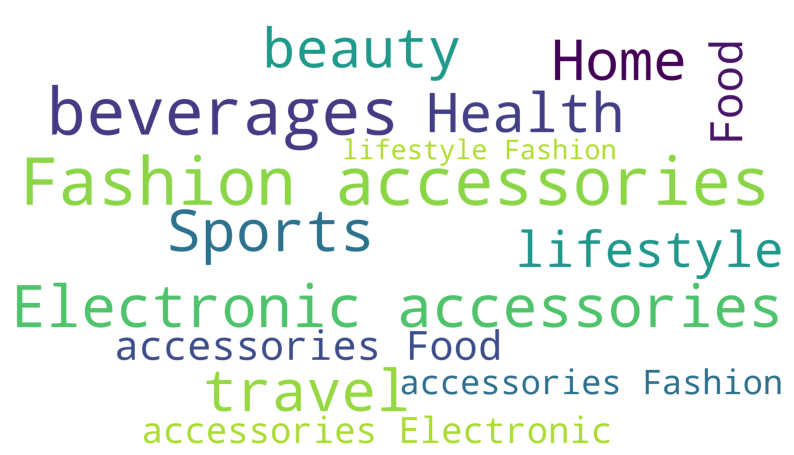

In [67]:
plt.subplots(figsize=(10,9))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 9) Vendas por categoria de produtos: Em que horários ocorrem as vendas mais expressivas para cada categoria de produtos, e como podemos alinhar o estoque e a equipe de vendas a esses padrões?


## 10) Horários lucrativos: Quais são os horários mais lucrativos para o negócio?

## 11) Média de avaliações dos clientes: Qual é a média de avaliações dos clientes e como podemos melhorar a experiência do cliente para aumentar essa média?


R: "Food and Beverages" tem as maiores medias de avaliação e "Sport and Travel" possui um total maior de vendas, isso mostra que as avaliaçoes são importantes porem as vendas podem ser influencidas por outros fatores como a popularidade do produto, demanda do mercado, sazionalidade e etc.

Qual a linha de produtos mais popular?
R: Segundo a media de avaliações, Food and Beverages é a categoria de produtos mais popular entre os cliente

Qual é a classificação média dos clientes?
1) Electronic accessories  6.990698  
2) Fashion accessories    7.043529  
3) Food and beverages    7.287209  
4) Health and beauty    6.983117  
5) Home and lifestyle     6.812346  
6) Sports and travel     6.978824



             Product line    Rating       Total
0  Electronic accessories  6.924706  54337.5315
1     Fashion accessories  7.029213  54305.8950
2      Food and beverages  7.113218  56144.8440
3       Health and beauty  7.003289  49193.7390
4      Home and lifestyle  6.837500  53861.9130
5       Sports and travel  6.916265  55122.8265


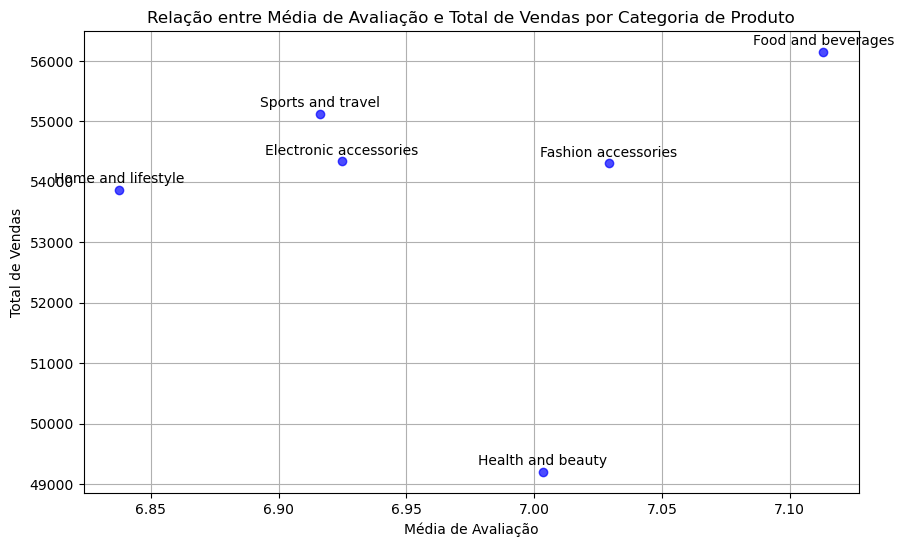

In [68]:
resumo_categoria = df.groupby('Product line').agg({'Rating': 'mean', 'Total': 'sum'}).reset_index()
print(resumo_categoria)

plt.figure(figsize=(10, 6))
plt.scatter(resumo_categoria['Rating'], resumo_categoria['Total'], color='blue', alpha=0.7)


plt.xlabel('Média de Avaliação')
plt.ylabel('Total de Vendas')
plt.title('Relação entre Média de Avaliação e Total de Vendas por Categoria de Produto')


for i, txt in enumerate(resumo_categoria['Product line']):
    plt.annotate(txt, (resumo_categoria['Rating'][i], resumo_categoria['Total'][i]), textcoords="offset points", xytext=(0,5), ha='center')


plt.grid(True)
plt.show()


O grafico de dispersão mostra os pontos sendo a quantidade total de vendas no eixo Y com notas de avaliações no eixo X

## 12) Vendas para afiliados: Dentro de um número x de vendas no mês, quantas foram para afiliados?

In [69]:
vendas_afiliados = df[df['Customer type'] == 'Member']

numero_vendas_afiliados = vendas_afiliados.shape[0]

print(f"Vendas para afiliados: {numero_vendas_afiliados}")

Vendas para afiliados: 501


In [70]:
vendas_nao_afiliados = df[df['Customer type'] == 'Normal']

numero_vendas_nao_afiliados = vendas_nao_afiliados.shape[0]

print(f"Vendas para não afiliados: {numero_vendas_nao_afiliados}")

Vendas para não afiliados: 499


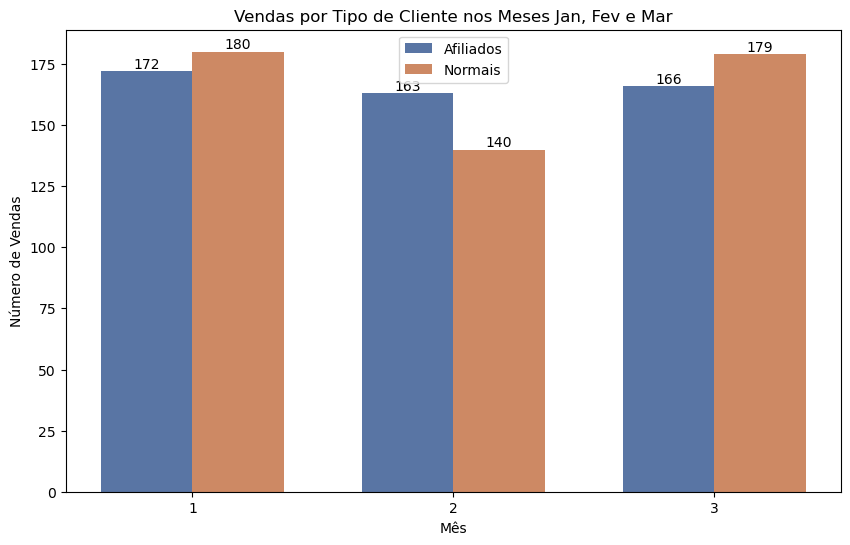

In [71]:
vendas_afiliados_meses_1_2_3 = df[(df['Customer type'] == 'Member') & (df['Month'].isin([1, 2, 3]))]
vendas_normais_meses_1_2_3 = df[(df['Customer type'] == 'Normal') & (df['Month'].isin([1, 2, 3]))]

vendas_afiliados_por_mes = vendas_afiliados_meses_1_2_3.groupby('Month').size().reset_index(name='Afiliados')
vendas_normais_por_mes = vendas_normais_meses_1_2_3.groupby('Month').size().reset_index(name='Normais')

largura_barra = 0.35 

posicoes_afiliados = vendas_afiliados_por_mes['Month']
posicoes_normais = posicoes_afiliados + largura_barra

plt.figure(figsize=(10, 6))

barras_afiliados = plt.bar(posicoes_afiliados, vendas_afiliados_por_mes['Afiliados'], largura_barra, color='#5975A4', label='Afiliados')

barras_normais = plt.bar(posicoes_normais, vendas_normais_por_mes['Normais'], largura_barra, color="#CD8964", label='Normais')

plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Tipo de Cliente nos Meses Jan, Fev e Mar')
plt.xticks(posicoes_afiliados + largura_barra / 2, vendas_afiliados_por_mes['Month'])
plt.legend()

for i, v in enumerate(vendas_afiliados_por_mes['Afiliados']):
    plt.text(posicoes_afiliados[i], v + 0.02, int(v), ha='center', va='bottom')

for i, v in enumerate(vendas_normais_por_mes['Normais']):
    plt.text(posicoes_normais[i], v + 0.02, int(v), ha='center', va='bottom')

plt.show()

## 13) Influência do tipo de cliente no ticket médio: Como o tipo de cliente (Member/Normal) influencia no ticket médio de compra?


In [72]:
ticket_medio_por_cliente = df.groupby('Customer type')['Total'].mean().reset_index(name='Ticket Médio')
print(ticket_medio_por_cliente)

  Customer type  Ticket Médio
0        Member    327.791305
1        Normal    318.122856


In [73]:
ticket_medio_cliente = df.groupby('Customer type').agg({'Total': 'sum', 'Quantity': 'count'})
ticket_medio_cliente.rename(columns={'Total': 'Montante', 'Quantity': 'No. Compras'}, inplace=True)
ticket_medio_cliente['Ticket Médio'] = ticket_medio_cliente['Montante'] / ticket_medio_cliente['No. Compras']

In [74]:
print(ticket_medio_cliente[['Montante', 'No. Compras', 'Ticket Médio']])

                 Montante  No. Compras  Ticket Médio
Customer type                                       
Member         164223.444          501    327.791305
Normal         158743.305          499    318.122856


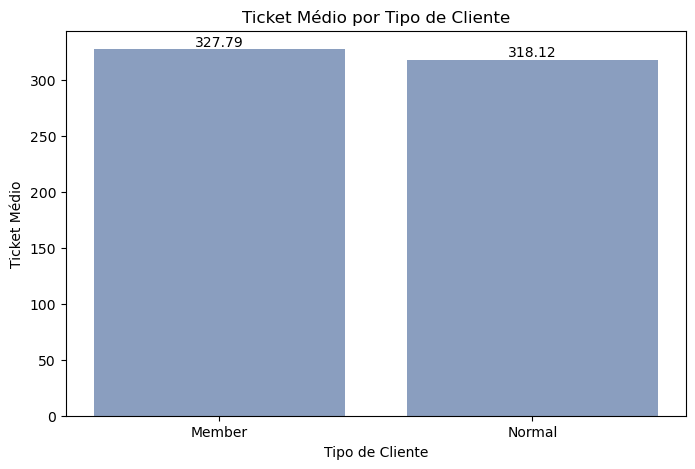

In [75]:
plt.figure(figsize=(8, 5))
barras = plt.bar(ticket_medio_cliente.index, ticket_medio_cliente['Ticket Médio'], color='#5975A4', alpha=0.7)

plt.xlabel('Tipo de Cliente')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Tipo de Cliente')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2),  ha='center', va='bottom')
    
plt.show()

O montante de vendas e o ticket médio, mostram a eficácia da campanha de captação de clientes para o programa de fidelidade no qual consigmos ver pelo gráfico a cima. Mostrando assim que os beneficios oferecidos pelo programa de fidelidade acabam impactando positivamente nas compras dos clientes fidelizados.

## 14) Impacto do método de pagamento na taxa de conversão de vendas: Como o método de pagamento impacta na taxa de conversão de vendas?


## 15) Média de avaliação dos produtos: Qual é a média de avaliação dos produtos e como ela se relaciona com as vendas?


In [76]:
media_avaliacao =df['Rating'].mean()
media_avaliacao

6.9727

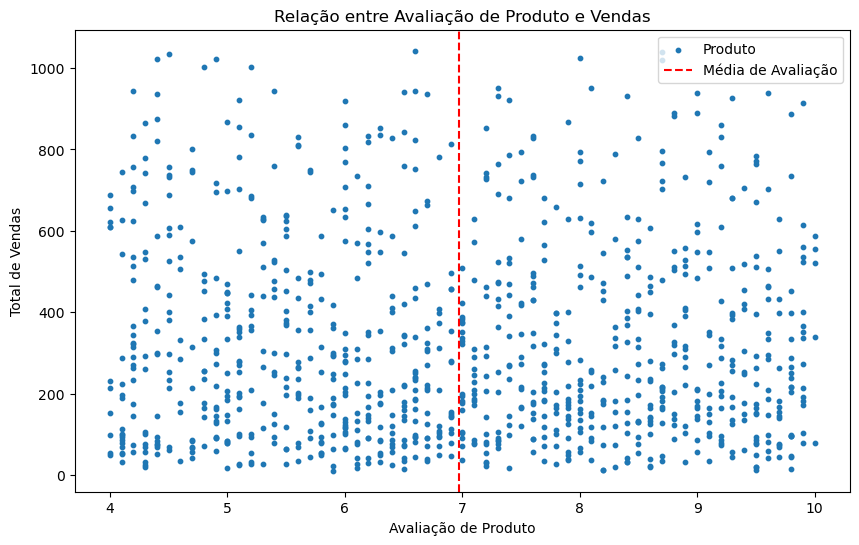

In [77]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Rating'], df['Total'], s=10, label='Produto')

plt.axvline(x=media_avaliacao, color='red', linestyle='--', label='Média de Avaliação')

plt.xlabel('Avaliação de Produto')
plt.ylabel('Total de Vendas')
plt.title('Relação entre Avaliação de Produto e Vendas')
plt.legend()

plt.show()


## 16) Influência da localização geográfica nas preferências de produtos: Como a localização geográfica das filiais influencia nas preferências de produtos?


## 17) Relação entre o horário de compra e a quantidade de produtos adquiridos: Qual é a relação entre o horário de compra e a quantidade de produtos adquiridos?


In [78]:
df['Hour'] = df['Time'].dt.floor('H')

In [79]:
df['Hour'] = df['Hour'].dt.strftime('%H:%M')

In [80]:
hora_agregada = df.groupby('Hour')['Quantity'].sum().reset_index()
hora_agregada

,Hour,Quantity
0,10:00,525
1,11:00,513
2,12:00,501
3,13:00,585
4,14:00,495
5,15:00,530
6,16:00,420
7,17:00,415
8,18:00,475
9,19:00,649


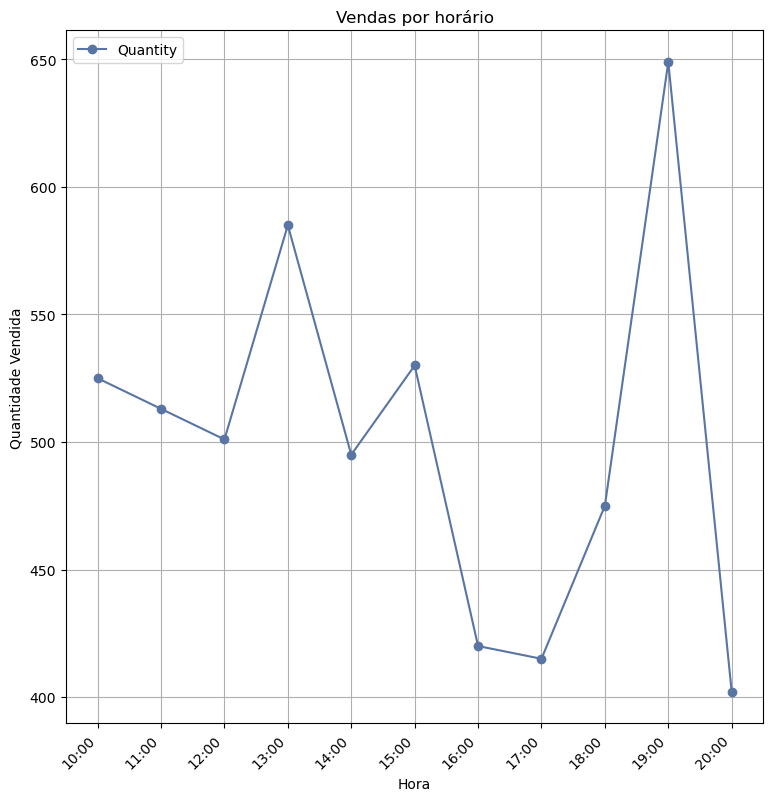

In [81]:
hora_agregada.plot(kind='line', marker='o', color='#5975A4')

plt.title('Vendas por horário')
plt.xlabel('Hora')
plt.ylabel('Quantidade Vendida')

horarios = hora_agregada.index
plt.xticks(range(len(horarios)), horarios)
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(hora_agregada['Hour'])

plt.grid(True)
plt.show()

## 18) Impacto da participação em programas de fidelidade nas decisões de compra: Como a participação em programas de fidelidade impacta nas decisões de compra?

## 19) Gênero predominante entre os clientes: Qual é o gênero predominante entre os clientes?

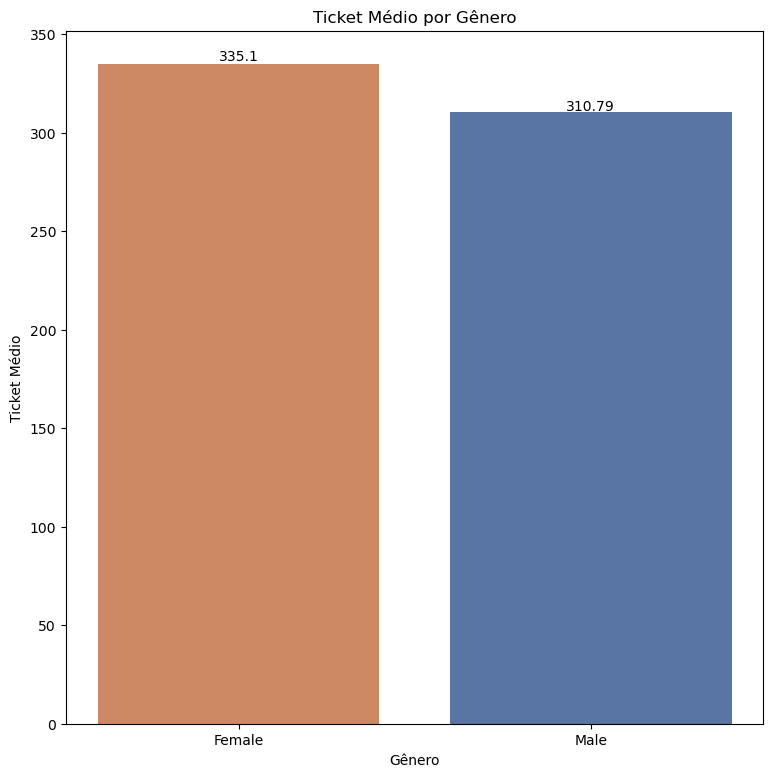

In [82]:
plt.bar(ticket_medio_genero.index, ticket_medio_genero['Ticket Médio'], color=["#CD8964", '#5975A4'])

ax = plt.gca()

for i, v in enumerate(ticket_label):
    ax.text(i, int(v) + 0.03, round(v, 2), ha='center', va='bottom')


plt.xlabel('Gênero')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Gênero')

plt.rcParams['figure.figsize'] = (9,9)
plt.show()

Tabela de Contagem de Gênero:
   Gênero  Contagem
0  Female       501
1    Male       499




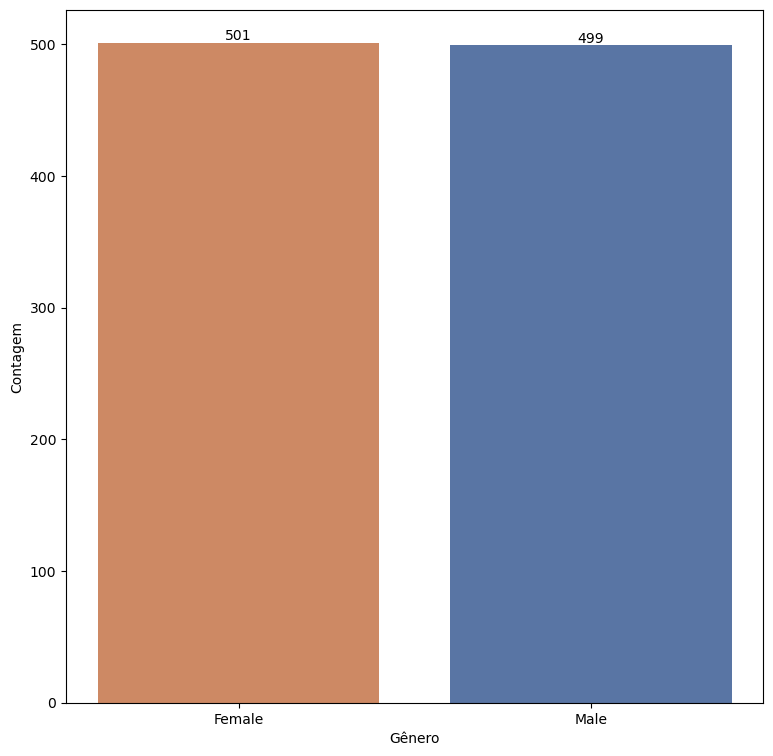

In [83]:
contagem_genero = df['Gender'].value_counts()


tabela_genero = pd.DataFrame({'Gênero': contagem_genero.index, 'Contagem': contagem_genero.values})


print("Tabela de Contagem de Gênero:")
print(tabela_genero)
print("\n")


fig, ax = plt.subplots()


bars = ax.bar(contagem_genero.index, contagem_genero.values, color=["#CD8964", '#5975A4'])


ax.set_xlabel('Gênero')
ax.set_ylabel('Contagem')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()


## 20) Linha de produto mais popular: Qual é a linha de produto mais popular?


In [84]:
produto_mais_popular = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
produto_mais_popular.astype

<bound method NDFrame.astype of Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64>

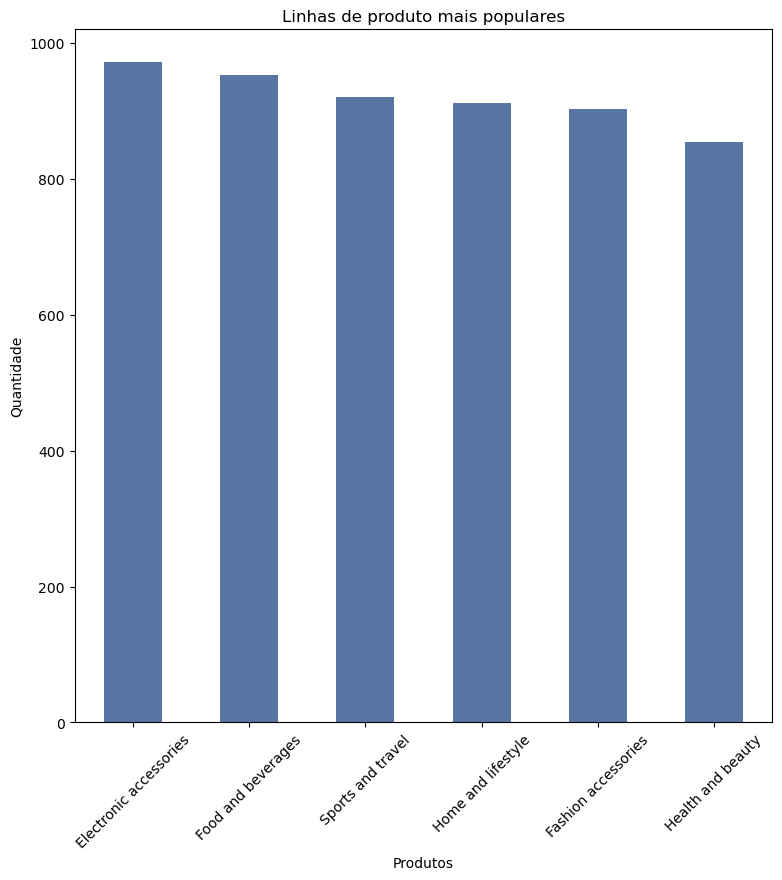

In [85]:
fig, ax = plt.subplots()
produto_mais_popular.plot(kind='bar', color='#5975A4')
ax.set_xlabel('Produtos')
ax.set_ylabel('Quantidade')
ax.set_title('Linhas de produto mais populares')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')

plt.show()

## 21) Classificação média dos clientes: Qual é a classificação média dos clientes?


## 22) Cidade com o maior número de vendas: Qual é a cidade com o maior número de vendas?
